<a href="https://colab.research.google.com/github/MOHITATRISINGH/ml-lab/blob/main/ml_lab_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df = pd.read_csv('Iris.csv')

df = df.drop(columns=['Id','Species'])

X = df[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']]
X


,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [2]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b)**2))

def initialize_centroids(X, k):
    return X[np.random.choice(X.shape[0], k, replace=False)]

def assign_clusters(X, centroids):
    clusters = []
    for x in X:
        distances = [euclidean_distance(x, centroid) for centroid in centroids]
        clusters.append(np.argmin(distances))
    return np.array(clusters)

def update_centroids(X, clusters, k):
    new_centroids = []
    for i in range(k):
        cluster_points = X[clusters == i]
        new_centroids.append(cluster_points.mean(axis=0))
    return np.array(new_centroids)

def compute_sse(X, centroids, clusters):
    sse = 0
    for i in range(len(X)):
        centroid = centroids[clusters[i]]
        sse += euclidean_distance(X[i], centroid) ** 2
    return sse

def kmeans_manual(X, k, max_iters=100):
    X = np.array(X)
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        clusters = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, clusters, k)
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    sse = compute_sse(X, centroids, clusters)
    return sse, clusters



In [5]:
manual_sse = []
library_sse = []

for k in range(2, 6):
    # done by manual SSE
    sse_manual, clusters = kmeans_manual(X, k)
    manual_sse.append(sse_manual)

    # Library SSE
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    lib_sse = kmeans.inertia_
    library_sse.append(lib_sse)

# Print comparison
print("K\tcalculated sum of square error by manual\tcalculated by predefined library function SSE")
for i, k in enumerate(range(2, 6)):
    print(f"{k}\t{manual_sse[i]:.2f}\t\t\t\t\t\t\t{library_sse[i]:.5f}")


K	calculated sum of square error by manual	calculated by predefined library function SSE
2	152.37							152.36871
3	78.94							78.94507
4	71.34							57.31787
5	53.28							49.91714


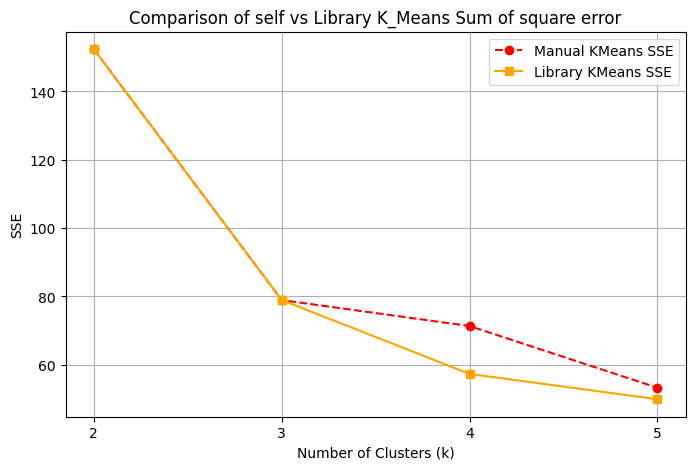

In [7]:

k_values = [2,3,4,5]
plt.figure(figsize=(8, 5))
plt.plot(k_values, manual_sse, marker='o', label='Manual KMeans SSE', linestyle='--', color='red')
plt.plot(k_values, library_sse, marker='s', label='Library KMeans SSE', linestyle='-', color='orange')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')
plt.title('Comparison of self vs Library K_Means Sum of square error')
plt.legend()
plt.grid(True)
plt.xticks(k_values)
plt.show()

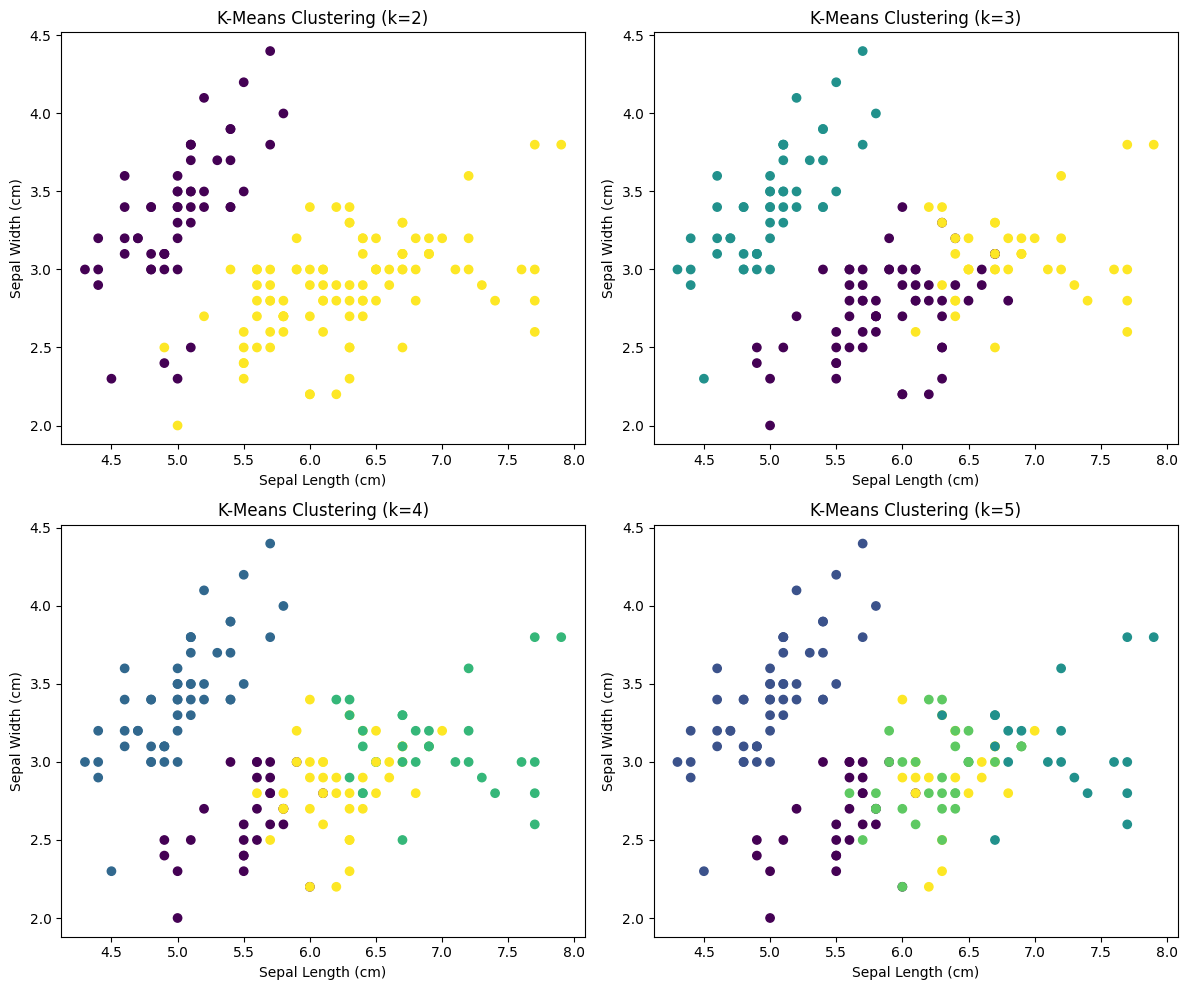

In [8]:

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
k_values = [2, 3, 4, 5]
axes = axes.flatten()

for i, k in enumerate(k_values):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X)

    axes[i].scatter(df['SepalLength'], df['SepalWidth'], c=labels, cmap='viridis')
    axes[i].set_title(f'K-Means Clustering (k={k})')
    axes[i].set_xlabel('Sepal Length (cm)')
    axes[i].set_ylabel('Sepal Width (cm)')

plt.tight_layout()
plt.show()


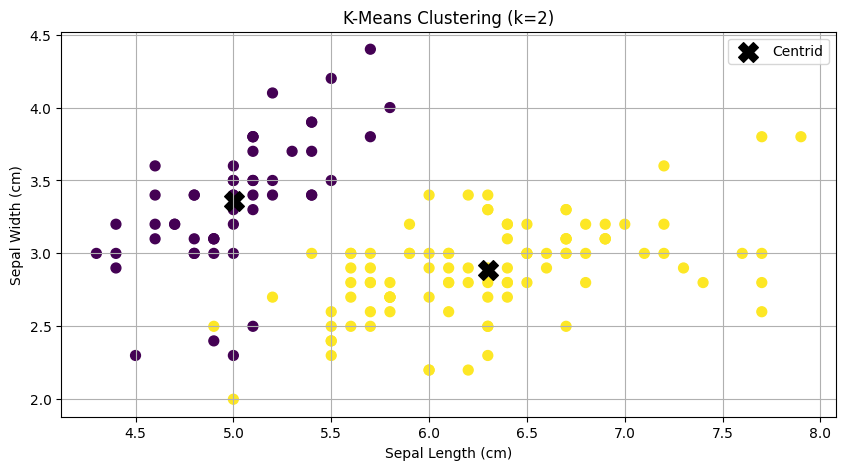

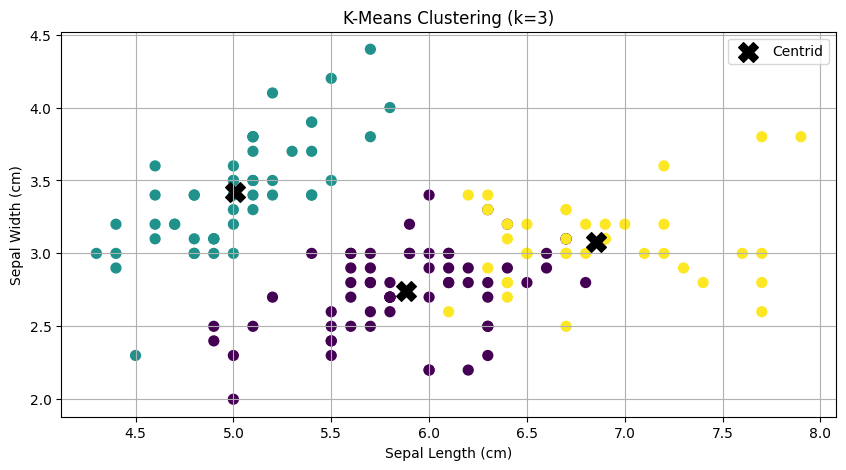

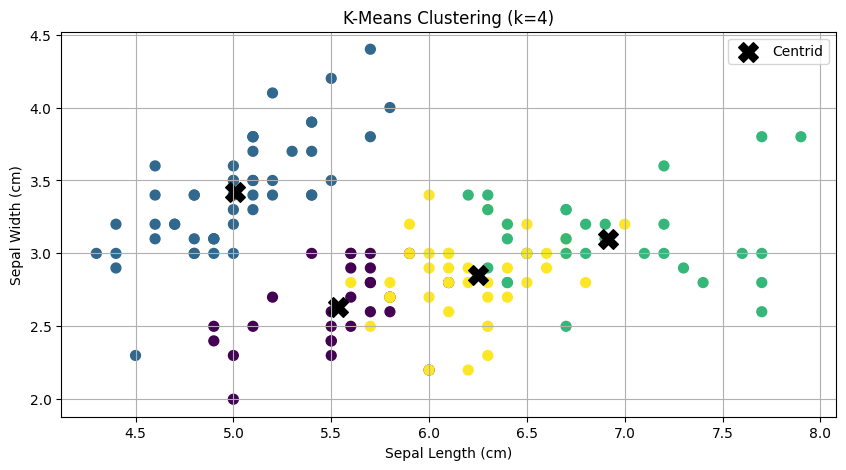

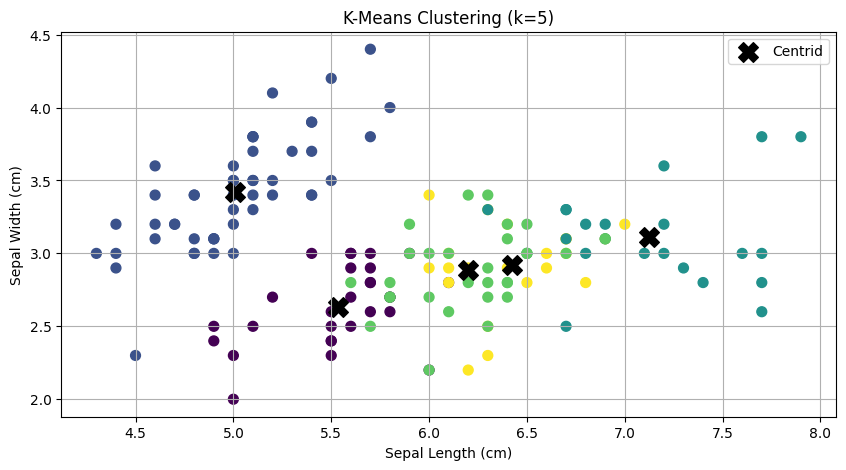

In [12]:
from sklearn.cluster import KMeans
# Feature space for plotting (2D)
X_plot = df[['SepalLength', 'SepalWidth']]

# Plot for each k
k_values = [2, 3, 4, 5]

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X)
    centroids = kmeans.cluster_centers_

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.scatter(X_plot['SepalLength'], X_plot['SepalWidth'], c=labels, cmap='viridis', s=50)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=200, label='Centrid')
    plt.xlabel('Sepal Length (cm)')
    plt.ylabel('Sepal Width (cm)')
    plt.title(f'K-Means Clustering (k={k})')
    plt.legend()
    plt.grid(True)
    plt.show()

